<a href="https://colab.research.google.com/github/CaptainChuenthavorn/Data-Analytics2022s/blob/main/DA_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/drive/folders/13jg09xoX1EqbtY04AGenSlzsjHmvbG80?usp=sharing

A_train
"https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-train.csv"

A_test
https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-test.csv

-------------------------------
B-train
https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-train.csv

B-test
https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-test.csv

##Implement

In [1]:
import numpy as np
import pandas as pd

In [2]:
A_train_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-train.csv"
A_test_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/A-test.csv"
B_train_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-train.csv"
B_test_path = "https://raw.githubusercontent.com/CaptainChuenthavorn/Data-Analytics2022s/main/Assignment1/B-test.csv"

In [3]:
df = pd.read_csv(A_train_path)
df_ori = pd.read_csv(A_train_path)

##Description of Dataframe

In [4]:
print(len(df.index))

190


In [5]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,181.000000,180.000000,180.000000,1.810000e+02,180.000000,180.000000,180.000000,181.000000,188.000000
mean,6.314309,6.777722,2.463778,1.386800e+05,-0.053111,1.386444,-0.243444,-0.412652,3.949309
std,386.982400,363.353742,453.783083,8.599234e+05,35.906821,32.370122,34.640373,31.525100,8.350511
min,-2749.920000,-2327.200000,-2771.100000,4.800000e-01,-234.990000,-223.920000,-225.450000,-194.560000,-15.510000
25%,-62.680000,-61.442500,-60.385000,1.266650e+03,-6.060000,-4.710000,-5.907500,-7.200000,-2.260000
50%,12.210000,12.595000,1.815000,4.546800e+03,-0.760000,2.180000,-0.295000,-0.160000,3.555000
75%,75.650000,81.890000,53.740000,1.289133e+04,6.667500,8.462500,6.075000,6.600000,10.620000
max,2244.880000,2333.520000,3155.310000,6.083820e+06,226.260000,188.880000,220.950000,207.040000,28.200000


##histogram

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


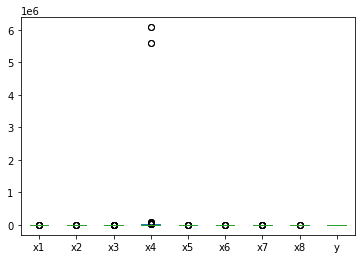

In [6]:
df.plot.box()

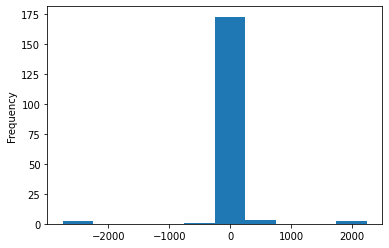

In [7]:
df['x1'].plot.hist()

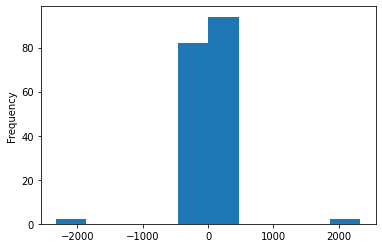

In [8]:
df['x2'].plot.hist()

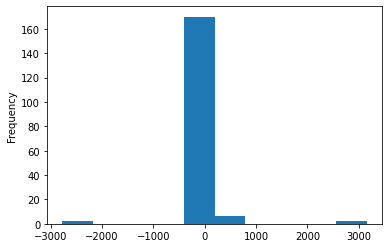

In [9]:
df['x3'].plot.hist()

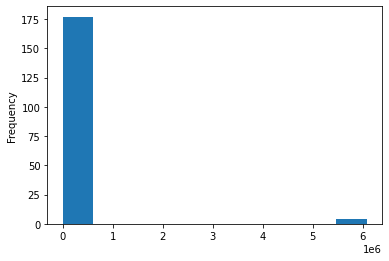

In [10]:
#  ค่าเป็น ++++++++++ 
df['x4'].plot.hist()

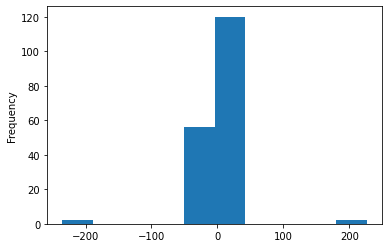

In [11]:
df['x5'].plot.hist()

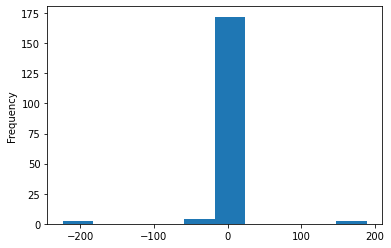

In [12]:
df['x6'].plot.hist()

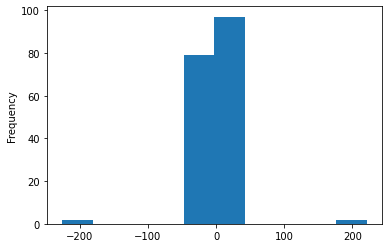

In [13]:
df['x7'].plot.hist()

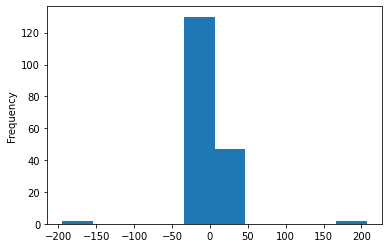

In [14]:
df['x8'].plot.hist()

##จะเห็นได้ว่ามีค่า outlier ที่ 50 75 90 160 โดดออกมา 1.

1.   เราจะcapออกก่อน
2.   ตัด row นั้นทิ้ง
เราจะcapออกก่อน
 

In [15]:
def cap_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    lst=[fence_low,fence_high]

    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return fence_low,fence_high

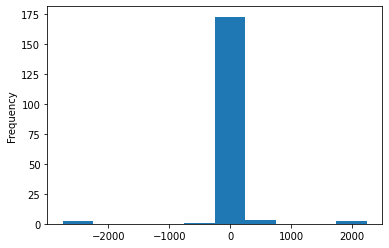

In [16]:
df['x1'].plot.hist()

In [17]:
df[47:50]
#focus x1 row47 = -2749.92	

,x1,x2,x3,x4,x5,x6,x7,x8,y
47,-2749.92,-36.02,-52.11,3878.80,-10.32,-6.58,0.91,14.74,-3.75
48,61.57,NaN,-177.36,NaN,NaN,7.31,3.01,-8.17,-1.81
49,-35.29,-144.60,80.42,2585.72,2.77,2.53,-2.15,3.22,8.71


In [18]:
df.loc[[95]]

#focus x2 row95 = -2327.2

,x1,x2,x3,x4,x5,x6,x7,x8,y
95,-42.05,-2327.2,89.85,3906.25,-6.42,-3.28,-10.65,0.48,5.51


In [19]:
df_ori.loc[[95]]

,x1,x2,x3,x4,x5,x6,x7,x8,y
95,-42.05,-2327.2,89.85,3906.25,-6.42,-3.28,-10.65,0.48,5.51


In [20]:
fence_low,fence_high = cap_outlier(df,'x1')

df['x1'].values[df['x1'].values < fence_low] = fence_low
df['x1'].values[df['x1'].values > fence_high] = fence_high


In [21]:
df[47:50]

,x1,x2,x3,x4,x5,x6,x7,x8,y
47,-270.175,-36.02,-52.11,3878.80,-10.32,-6.58,0.91,14.74,-3.75
48,61.570,NaN,-177.36,NaN,NaN,7.31,3.01,-8.17,-1.81
49,-35.290,-144.60,80.42,2585.72,2.77,2.53,-2.15,3.22,8.71


In [22]:
df.loc[[95]]
#row x2 95 shouldn't 

,x1,x2,x3,x4,x5,x6,x7,x8,y
95,-42.05,-2327.2,89.85,3906.25,-6.42,-3.28,-10.65,0.48,5.51


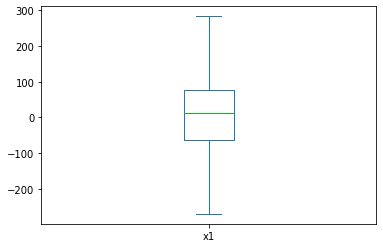

In [23]:
df['x1'].plot.box()

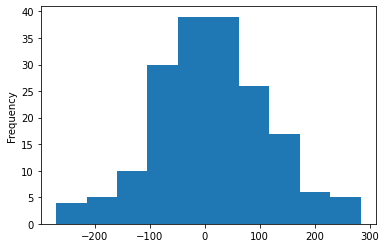

In [24]:
df['x1'].plot.hist()

In [25]:
df['x1'].mean()

12.444613259668508

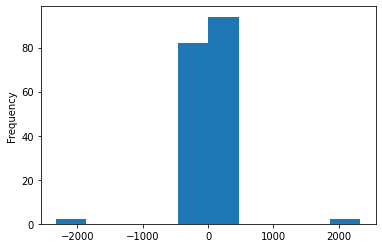

In [26]:
df['x2'].plot.hist()

In [27]:
for i in range(8):
  col_name = 'x'+str(i+1)
  print(col_name)
  fence_low,fence_high = cap_outlier(df,col_name)

  df[col_name].values[df[col_name].values < fence_low] = fence_low
  df[col_name].values[df[col_name].values > fence_high] = fence_high


x1
x2
x3
x4
x5
x6
x7
x8


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


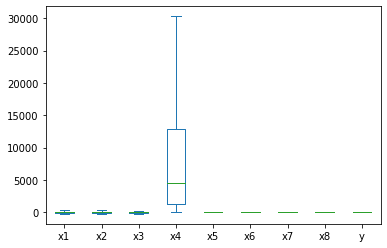

In [28]:

df.plot.box()

7.015020833333333


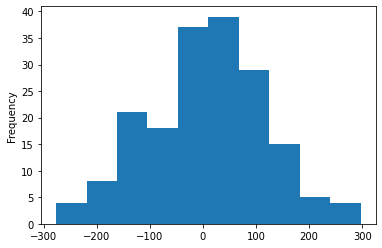

In [29]:
print(df['x2'].mean())
df['x2'].plot.hist()

-2.3207083333333327


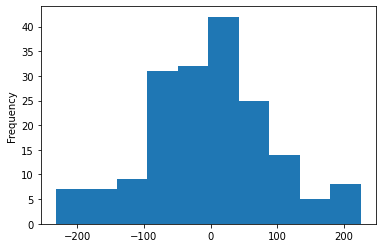

In [30]:
print(df['x3'].mean())
df['x3'].plot.hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


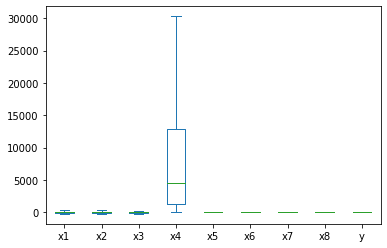

In [31]:
df.plot.box()

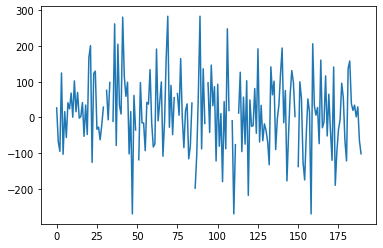

In [32]:
df['x1'].plot()

## Display data AFTER CAP OUTLIER

In [33]:

# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out
# df_out=remove_outlier(df,"x1")
# print(df_out)
# print(len(df.index))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


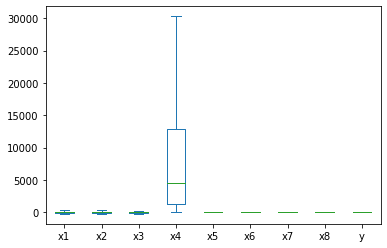

In [34]:
df.plot.box()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


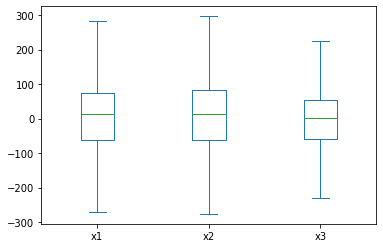

In [35]:
df[['x1','x2','x3']].plot.box()

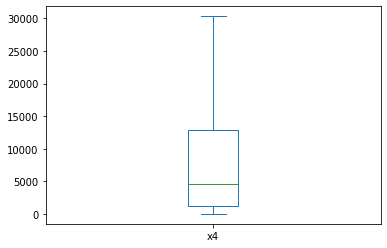

In [36]:
df[['x4']].plot.box()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


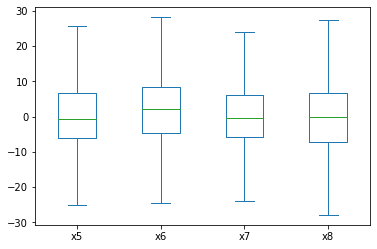

In [37]:
df[['x5','x6','x7','x8']].plot.box()

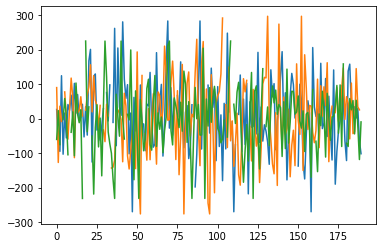

In [38]:
df['x1'].plot()
df['x2'].plot()
df['x3'].plot()

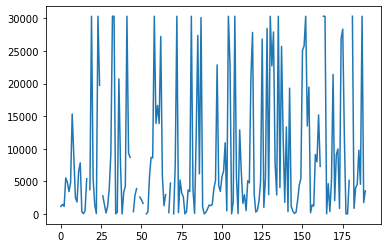

In [39]:
df['x4'].plot()

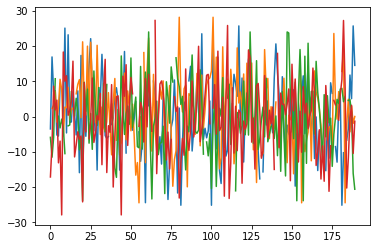

In [40]:
df['x5'].plot()
df['x6'].plot()
df['x7'].plot()
df['x8'].plot()

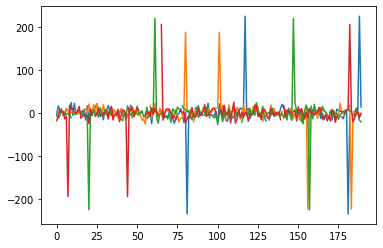

In [41]:
df_ori['x5'].plot()
df_ori['x6'].plot()
df_ori['x7'].plot()
df_ori['x8'].plot()

## Fill NaN with mean After cap outlier


In [42]:
df_ori[73:76]
#focus x1 row 74

,x1,x2,x3,x4,x5,x6,x7,x8,y
73,55.27,65.50,59.99,196.28,-23.51,-0.24,5.47,-4.39,8.55
74,NaN,-118.78,37.11,5204.18,-13.35,8.83,-1.85,-14.85,10.34
75,66.75,80.95,10.71,3222.83,-3.08,-4.98,14.12,-6.48,5.03


In [43]:
df[73:76]

,x1,x2,x3,x4,x5,x6,x7,x8,y
73,55.27,65.50,59.99,196.28,-23.51,-0.24,5.47,-4.39,8.55
74,NaN,-118.78,37.11,5204.18,-13.35,8.83,-1.85,-14.85,10.34
75,66.75,80.95,10.71,3222.83,-3.08,-4.98,14.12,-6.48,5.03


In [44]:
  #Finding the mean of the column having NaN
mean_value=df['x1'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
#gfg['G2'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print('mean_value',mean_value)
df['x1'].fillna(value=mean_value,inplace=True)
df[73:76]

Updated Dataframe:
mean_value 12.444613259668508


,x1,x2,x3,x4,x5,x6,x7,x8,y
73,55.270000,65.50,59.99,196.28,-23.51,-0.24,5.47,-4.39,8.55
74,12.444613,-118.78,37.11,5204.18,-13.35,8.83,-1.85,-14.85,10.34
75,66.750000,80.95,10.71,3222.83,-3.08,-4.98,14.12,-6.48,5.03


In [45]:
for j in range(8):
  col_name = 'x'+str(j+1)
  mean_value=df[col_name].mean()
  print(col_name,'mean value',mean_value)
  
  df[col_name].fillna(value=mean_value,inplace=True)
  print('fill',col_name,'sucess!')

x1 mean value 12.444613259668508
fill x1 sucess!
x2 mean value 7.015020833333333
fill x2 sucess!
x3 mean value -2.3207083333333327
fill x3 sucess!
x4 mean value 8896.819226519337
fill x4 sucess!
x5 mean value 0.05596527777777775
fill x5 sucess!
x6 mean value 1.8197569444444444
fill x6 sucess!
x7 mean value -0.18787500000000013
fill x7 sucess!
x8 mean value -0.5571823204419888
fill x8 sucess!


In [46]:
df[73:76]

,x1,x2,x3,x4,x5,x6,x7,x8,y
73,55.270000,65.50,59.99,196.28,-23.51,-0.24,5.47,-4.39,8.55
74,12.444613,-118.78,37.11,5204.18,-13.35,8.83,-1.85,-14.85,10.34
75,66.750000,80.95,10.71,3222.83,-3.08,-4.98,14.12,-6.48,5.03


In [47]:
print("ORIGINAL BELOW")
df.describe()

ORIGINAL BELOW


,x1,x2,x3,x4,x5,x6,x7,x8,y
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,188.000000
mean,12.444613,7.015021,-2.320708,8896.819227,0.055965,1.819757,-0.187875,-0.557182,3.949309
std,102.694637,108.638178,92.846620,9984.909877,10.414652,9.879952,9.682497,10.407941,8.350511
min,-270.175000,-276.441250,-231.572500,0.480000,-25.151250,-24.468750,-23.881250,-27.900000,-15.510000
25%,-52.785000,-57.417500,-58.435000,1380.122500,-5.600000,-4.377500,-5.745000,-6.825000,-2.260000
50%,12.444613,7.197510,-2.320708,4821.315000,0.055965,1.819757,-0.187875,-0.557182,3.555000
75%,69.772500,77.492500,49.057500,11857.062500,6.407500,8.145000,5.740000,6.355000,10.620000
max,283.145000,296.888750,224.927500,30328.350000,25.758750,28.221250,24.048750,27.300000,28.200000


In [48]:

print('---------------------------------------')
print('***************************************')
print('---------------------------------------')
print("MODIFIED BELOW")
df_ori.describe()

---------------------------------------
***************************************
---------------------------------------
MODIFIED BELOW


,x1,x2,x3,x4,x5,x6,x7,x8,y
count,181.000000,180.000000,180.000000,1.810000e+02,180.000000,180.000000,180.000000,181.000000,188.000000
mean,6.314309,6.777722,2.463778,1.386800e+05,-0.053111,1.386444,-0.243444,-0.412652,3.949309
std,386.982400,363.353742,453.783083,8.599234e+05,35.906821,32.370122,34.640373,31.525100,8.350511
min,-2749.920000,-2327.200000,-2771.100000,4.800000e-01,-234.990000,-223.920000,-225.450000,-194.560000,-15.510000
25%,-62.680000,-61.442500,-60.385000,1.266650e+03,-6.060000,-4.710000,-5.907500,-7.200000,-2.260000
50%,12.210000,12.595000,1.815000,4.546800e+03,-0.760000,2.180000,-0.295000,-0.160000,3.555000
75%,75.650000,81.890000,53.740000,1.289133e+04,6.667500,8.462500,6.075000,6.600000,10.620000
max,2244.880000,2333.520000,3155.310000,6.083820e+06,226.260000,188.880000,220.950000,207.040000,28.200000


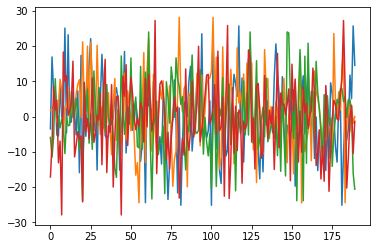

In [49]:
df['x5'].plot()
df['x6'].plot()
df['x7'].plot()
df['x8'].plot()

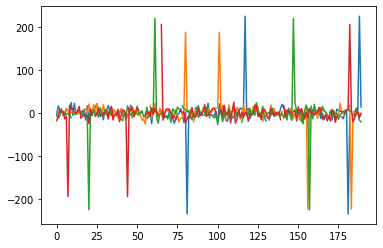

In [50]:
df_ori['x5'].plot()
df_ori['x6'].plot()
df_ori['x7'].plot()
df_ori['x8'].plot()

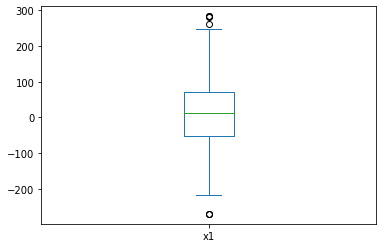

In [51]:
df['x1'].plot.box()

Found y have NaN 2 row - Have to delete row

In [52]:
df.isnull().sum().sum()

2

In [53]:
df['y'].isnull().sum()

2

In [54]:
df.dropna(subset = ["y"], inplace=True)

In [55]:
df['y'].isnull().sum()

0

In [56]:
import seaborn as sns

In [99]:
str_list=['x1','x2','x3','x4','x5','x6','x7','x8']

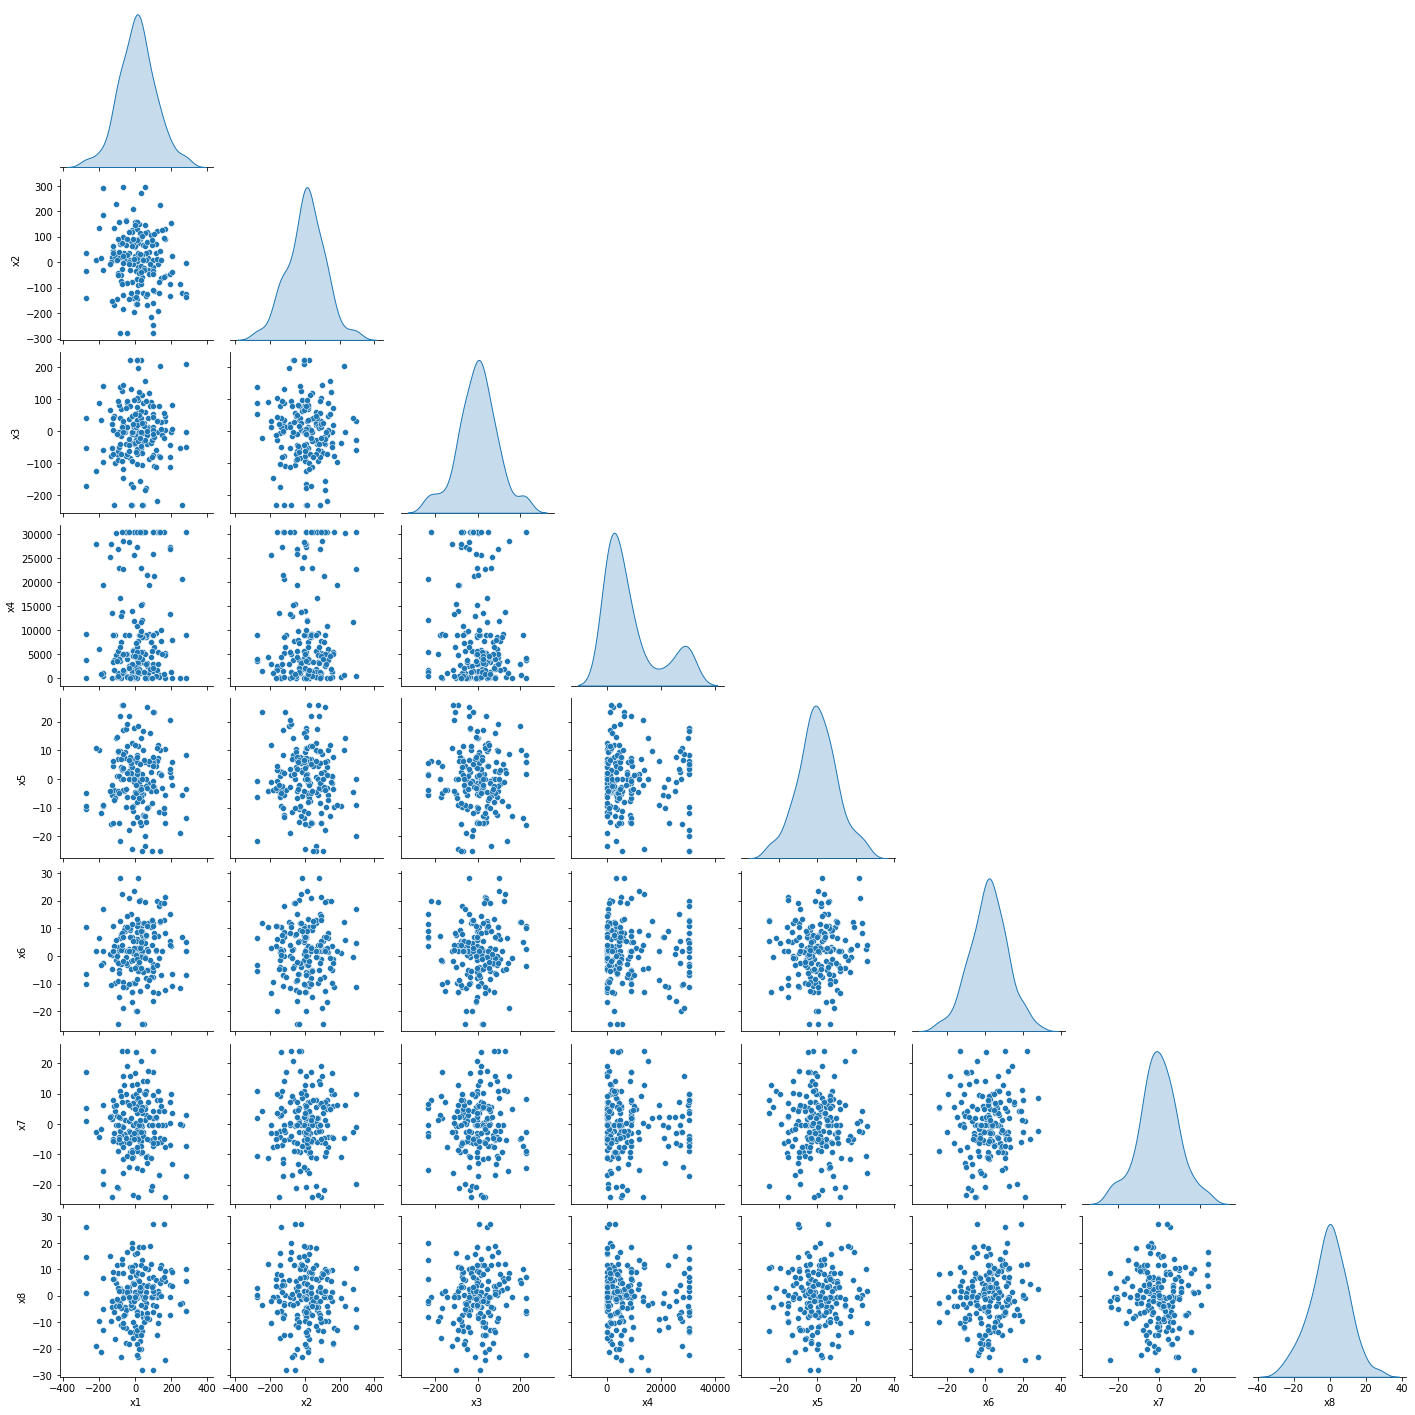

In [58]:
sns.pairplot(df[str_list],diag_kind="kde",corner=True)

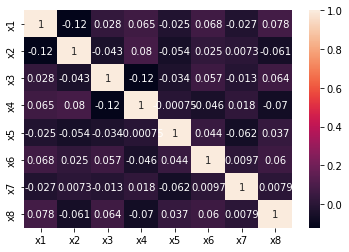

In [59]:
sns.heatmap(df[str_list].corr(),annot=True)

## REGRESSION

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [61]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04,-3.49000,1.819757,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49,16.95000,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04,6.97000,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,-2.320708,5527.92,7.36000,7.230000,10.770000,1.92,-0.42
4,-103.25,7.015021,-2.890000,4865.06,-5.21000,-1.540000,-0.187875,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28,-3.43000,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80,11.81000,-4.310000,4.860000,-0.42,3.79
187,29.46,33.910000,-20.960000,30328.35,5.10000,2.930000,1.230000,3.23,-3.17
188,-64.93,25.390000,-118.740000,1746.40,25.75875,-1.910000,-16.110000,-10.44,0.97


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      188 non-null    float64
 1   x2      188 non-null    float64
 2   x3      188 non-null    float64
 3   x4      188 non-null    float64
 4   x5      188 non-null    float64
 5   x6      188 non-null    float64
 6   x7      188 non-null    float64
 7   x8      188 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 14.7 KB


In [63]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,11.822297,5.775021,-1.901195,8874.919271,-0.008120,1.865180,-0.238438,-0.589067,3.949309
std,102.885349,108.302600,93.238220,9994.780626,10.414066,9.921410,9.640782,10.420127,8.350511
min,-270.175000,-276.441250,-231.572500,0.480000,-25.151250,-24.468750,-23.881250,-27.900000,-15.510000
25%,-53.820000,-59.062500,-58.965000,1373.082500,-5.632500,-4.427500,-5.735000,-6.980000,-2.260000
50%,12.444613,7.015021,-2.320708,4821.315000,0.055965,1.819757,-0.187875,-0.557182,3.555000
75%,69.737500,77.417500,49.927500,11813.547500,6.382500,8.247500,5.720000,6.305000,10.620000
max,283.145000,296.888750,224.927500,30328.350000,25.758750,28.221250,24.048750,27.300000,28.200000


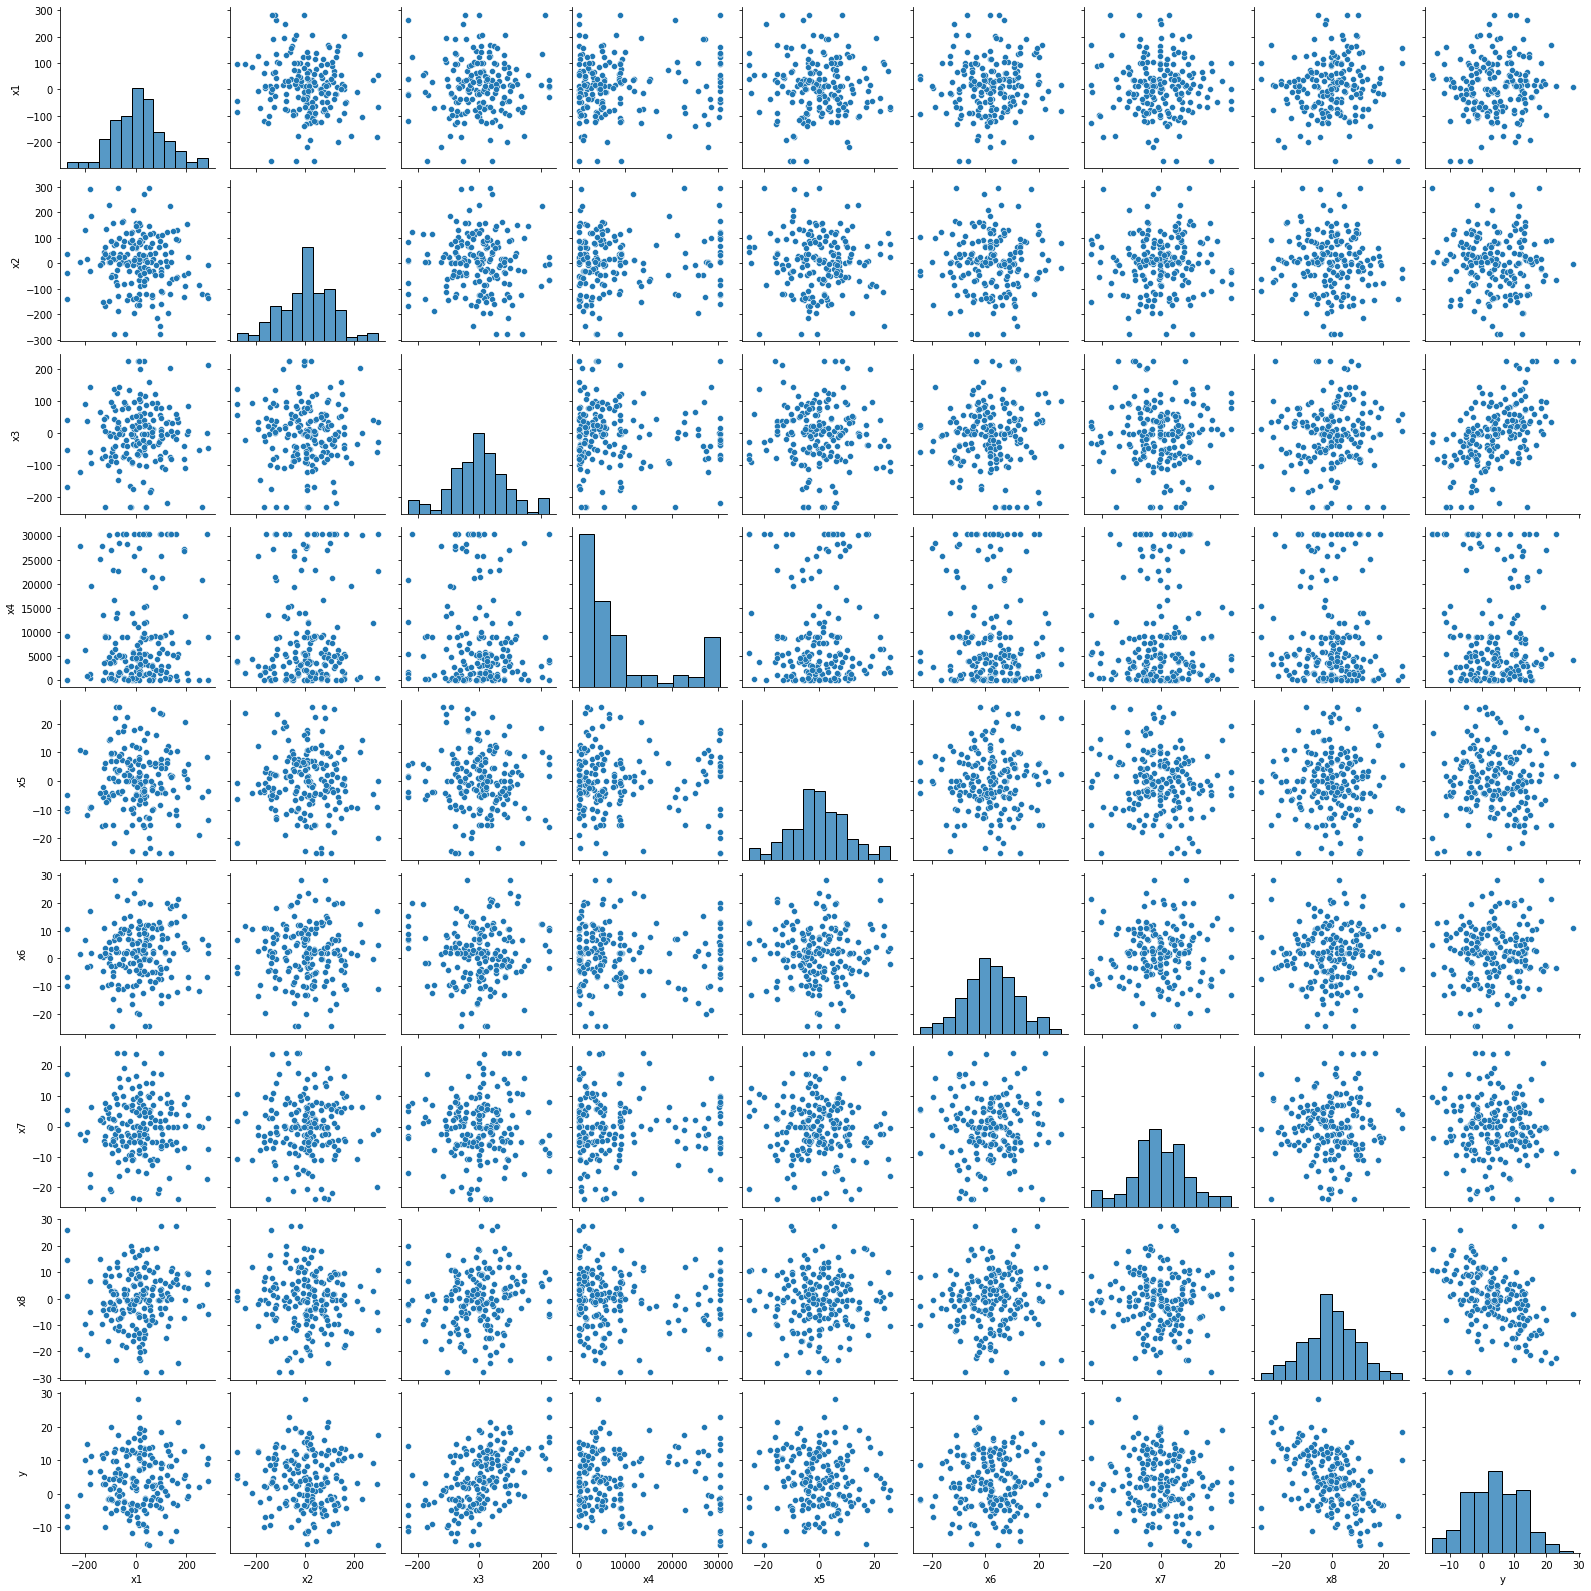

In [64]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


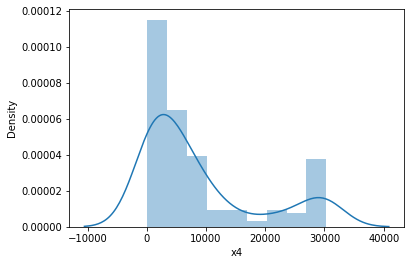

In [65]:
sns.distplot(df['x4'])

In [66]:
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,-0.123298,0.028437,0.064794,-0.024792,0.067721,-0.026643,0.077910,0.057234
x2,-0.123298,1.000000,-0.043121,0.079574,-0.053504,0.024856,0.007287,-0.061179,-0.067794
x3,0.028437,-0.043121,1.000000,-0.115782,-0.034339,0.057412,-0.013284,0.064496,0.514735
x4,0.064794,0.079574,-0.115782,1.000000,-0.000748,-0.046352,0.017564,-0.069630,-0.057386
x5,-0.024792,-0.053504,-0.034339,-0.000748,1.000000,0.044188,-0.061922,0.036883,-0.020162
x6,0.067721,0.024856,0.057412,-0.046352,0.044188,1.000000,0.009734,0.059547,0.082774
x7,-0.026643,0.007287,-0.013284,0.017564,-0.061922,0.009734,1.000000,0.007915,-0.067937
x8,0.077910,-0.061179,0.064496,-0.069630,0.036883,0.059547,0.007915,1.000000,-0.448266
y,0.057234,-0.067794,0.514735,-0.057386,-0.020162,0.082774,-0.067937,-0.448266,1.000000


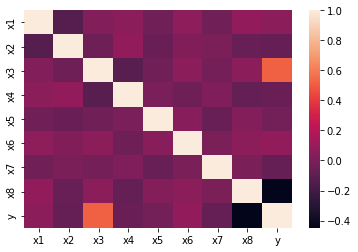

In [67]:
sns.heatmap(df.corr())

In [68]:
df.corr().sort_values("x2")[["x2"]]

,x2
x1,-0.123298
y,-0.067794
x8,-0.061179
x5,-0.053504
x3,-0.043121
x7,0.007287
x6,0.024856
x4,0.079574
x2,1.000000


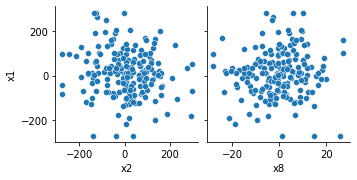

In [69]:
sns.pairplot(df, x_vars=["x2","x8"], y_vars=["x1"])

In [70]:
df.corr().sort_values("x3")[["x3"]]

,x3
x4,-0.115782
x2,-0.043121
x5,-0.034339
x7,-0.013284
x1,0.028437
x6,0.057412
x8,0.064496
y,0.514735
x3,1.000000


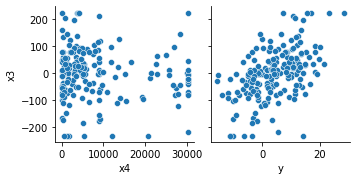

In [71]:
sns.pairplot(df, x_vars=["x4","y"], y_vars=["x3"])

In [72]:
df.corr().sort_values("x4")[["x4"]]

,x4
x3,-0.115782
x8,-0.069630
y,-0.057386
x6,-0.046352
x5,-0.000748
x7,0.017564
x1,0.064794
x2,0.079574
x4,1.000000


In [73]:
df.corr().sort_values("x5")[["x5"]]

,x5
x7,-0.061922
x2,-0.053504
x3,-0.034339
x1,-0.024792
y,-0.020162
x4,-0.000748
x8,0.036883
x6,0.044188
x5,1.000000


In [74]:
df.corr().sort_values("x6")[["x6"]]

,x6
x4,-0.046352
x7,0.009734
x2,0.024856
x5,0.044188
x3,0.057412
x8,0.059547
x1,0.067721
y,0.082774
x6,1.000000


In [75]:
df.corr().sort_values("x7")[["x7"]]

,x7
y,-0.067937
x5,-0.061922
x1,-0.026643
x3,-0.013284
x2,0.007287
x8,0.007915
x6,0.009734
x4,0.017564
x7,1.000000


In [76]:
df.corr().sort_values("x8")[["x8"]]

,x8
y,-0.448266
x4,-0.069630
x2,-0.061179
x7,0.007915
x5,0.036883
x6,0.059547
x3,0.064496
x1,0.077910
x8,1.000000


In [77]:
x=df[['x1','x2','x3','x4','x5','x6','x7','x8']]
y=df['y']

In [78]:
x

,x1,x2,x3,x4,x5,x6,x7,x8
0,26.52,89.930000,-60.460000,1137.04,-3.49000,1.819757,-5.880000,-17.13
1,-68.18,-127.210000,23.300000,1471.49,16.95000,2.300000,-11.510000,-7.70
2,-95.05,36.100000,-75.270000,1158.04,6.97000,3.210000,-5.860000,8.65
3,124.40,-8.190000,-2.320708,5527.92,7.36000,7.230000,10.770000,1.92
4,-103.25,7.015021,-2.890000,4865.06,-5.21000,-1.540000,-0.187875,4.69
...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28,-3.43000,4.950000,4.600000,-11.73
186,1.62,145.020000,53.260000,4546.80,11.81000,-4.310000,4.860000,-0.42
187,29.46,33.910000,-20.960000,30328.35,5.10000,2.930000,1.230000,3.23
188,-64.93,25.390000,-118.740000,1746.40,25.75875,-1.910000,-16.110000,-10.44


In [79]:
y

0       7.44
1       7.31
2      -5.77
3      -0.42
4       4.31
       ...  
185    11.78
186     3.79
187    -3.17
188     0.97
189     1.44
Name: y, Length: 188, dtype: float64

## To create a Linear Regression Model

#Normalized col "x4"

In [80]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [81]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [82]:
scaler=preprocessing.StandardScaler().fit(X_train)

In [83]:
X_train = scaler.transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

In [85]:
X_train

array([[-6.07759493e-01,  8.25473375e-01,  1.25914105e-01,
        -8.81935222e-01,  2.43165721e-01,  1.28527991e+00,
         2.10328396e+00,  2.29158817e-01],
       [-5.61700937e-01, -2.73527598e+00,  9.16532430e-01,
        -5.15789184e-01, -5.27746694e-01, -5.88621348e-01,
        -1.12473232e+00,  1.22525953e-01],
       [-4.41868756e-02,  7.86979970e-01,  5.75945711e-01,
        -7.74807988e-01, -7.60471476e-02, -1.11542514e+00,
         1.47724443e+00, -6.32873210e-01],
       [-1.26397521e+00,  1.26668945e+00,  4.97285416e-01,
        -5.28071106e-01, -6.05104687e-01, -1.02990601e-01,
         6.57741312e-01, -5.42185447e-01],
       [ 1.74388592e+00,  1.46916865e+00, -3.24433611e-02,
        -7.62882077e-01,  1.08011526e-01,  1.28211864e-01,
         1.09466473e+00,  1.03538299e+00],
       [-4.41868756e-02, -6.98029511e-01,  2.30727011e+00,
        -5.21651122e-01,  7.82893328e-01,  3.95314667e-02,
         9.24025483e-01, -1.79902498e-02],
       [ 2.57666530e-01,  2.007683

# split train and test dataset

In [86]:
y_test

49      8.71
76     -6.90
123    -3.43
32     16.70
186     3.79
       ...  
131    17.63
149    10.70
172     8.34
175    -5.75
129    -4.99
Name: y, Length: 76, dtype: float64

In [87]:
print("len(X_train) : ", len(X_train))
print("len(X_test) : ", len(X_test))
print("len(y_train) : ", len(y_train))
print("len(y_test) : ", len(y_test))
#train มี 114 test มี 76 รวมเปน 190

len(X_train) :  112
len(X_test) :  76
len(y_train) :  112
len(y_test) :  76


# to train and create a linear regression model

In [88]:
lm = LinearRegression()

In [89]:
lm.fit(X_train,y_train)

LinearRegression()

In [90]:
lm.coef_

array([ 0.69932534, -0.46957006,  4.1757711 , -0.35102961, -0.28342447,
        0.19267915, -0.73844978, -3.87142802])

In [91]:
lm.intercept_

4.362946428571429

In [92]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(x.columns)):
  print("", lm.coef_[i],"*",x.columns[i],"   +")
print("", lm.intercept_)

LM MODEL

y =
 0.6993253392013894 * x1    +
 -0.4695700647100083 * x2    +
 4.175771100533689 * x3    +
 -0.35102960579392456 * x4    +
 -0.2834244745478478 * x5    +
 0.19267915370449276 * x6    +
 -0.7384497763604854 * x7    +
 -3.8714280199634126 * x8    +
 4.362946428571429


##  To evaluate the model

# to predict from the test set

In [93]:
y_pred = lm.predict(X_test)

In [94]:
y_pred

array([  6.88557995,   2.7949093 ,   0.75896234,   6.66833951,
         5.04831924,   2.73197362,  -2.25461547,  -0.77910339,
         6.18436283,  10.82067746,  -2.97531535,   2.74630609,
         1.74201525,  -3.51315372,   5.84516465,  11.58851289,
        -0.42750771,   5.8264671 ,   3.28044542,   0.09780038,
         7.55084101,  11.38815754,   2.02606232,  -3.10845812,
        17.24696961,   9.03330297,   5.34850708, -12.76989243,
         7.55593024,   2.71118001,  -5.14328879,  -3.35640345,
         0.42025078,   4.73354559,  -2.77968387,  17.30044506,
         5.75032424,   2.12606142,   6.60273137,  10.66221771,
         4.63628149,   6.19657858,   1.47565984,   9.40742572,
         8.77266301,  14.88120516,   2.11068579,   9.49021285,
         4.24895146,   8.30024711,  -4.46736883,  -5.27853506,
        -0.20259544,   0.82364438,  12.89703688,  11.04826979,
         2.35250244,   0.86133018,   8.1301657 ,   3.11306399,
         0.95749895,   4.7645423 ,  -7.24932655,   5.31

#to evaluate with some evaluation methods

In [95]:
import matplotlib.pyplot as plt

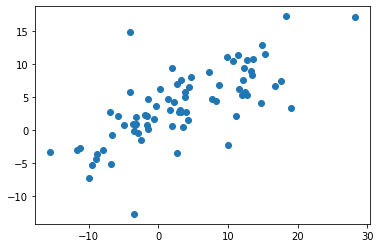

In [96]:
plt.scatter(y_test,y_pred)

In [97]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", rmse)

RMSE =  6.094421895210485


In [98]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")

MAPE =  140.4509727256486 %
